# SVM example

In [39]:
''' Needed libraries '''

import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler 
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Reading data

In [6]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

# Scaling data
*****
- El escalamiento está dado por:

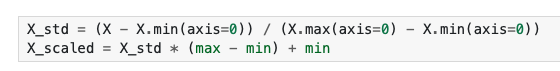

where min, max = feature_range.

sklearn MinMaxScaler() $\rightarrow$ [doc](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) 

In [7]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [10]:
X_train.shape

(120, 2)

In [11]:
y_train.shape

(120,)

# Plotting Data
*****

In [42]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [45]:
df = pd. DataFrame(X_scaled, columns=iris["feature_names"][2:4]) 

In [49]:
df["Class"] = y

In [50]:
df

,petal length (cm),petal width (cm),Class
0,0.067797,0.041667,0.0
1,0.067797,0.041667,0.0
2,0.050847,0.041667,0.0
3,0.084746,0.041667,0.0
4,0.067797,0.041667,0.0
...,...,...,...
145,0.711864,0.916667,1.0
146,0.677966,0.750000,1.0
147,0.711864,0.791667,1.0
148,0.745763,0.916667,1.0


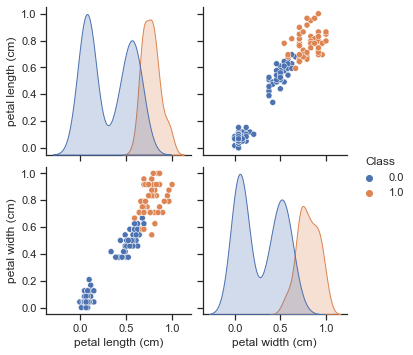

In [51]:
#pair plot (matrix scatterplot) of few columns
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,vars = iris["feature_names"][2:4], hue="Class")
plt.show()

In [17]:
def plot_classes(X, y, title, var1,var2, xlab, ylab):
    plt.figure()
    plt.scatter(X[:,var1][y != 1],X[:,var2][y != 1], c="m")
    plt.scatter(X[:,var1][y == 1],X[:,var2][y == 1], c="c")
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.grid()
    plt.show()

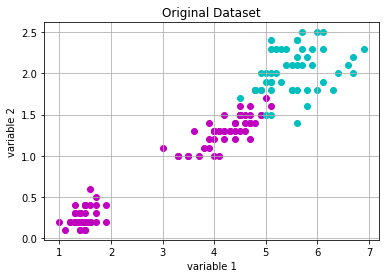

In [20]:
plot_classes(X,y,"Original Dataset",0, 1, "variable 1","variable 2")

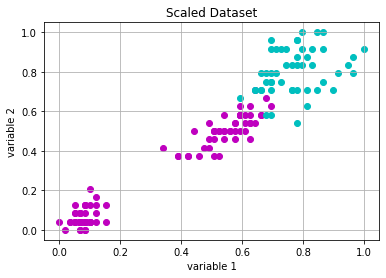

In [22]:
plot_classes(X_scaled,y,"Scaled Dataset",0, 1, "variable 1","variable 2")

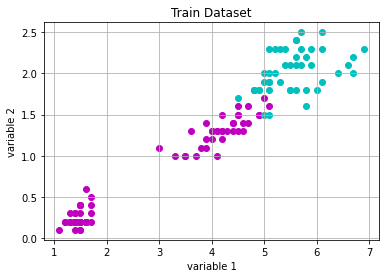

In [23]:
plot_classes(X_train,y_train,"Train Dataset",0, 1, "variable 1","variable 2")

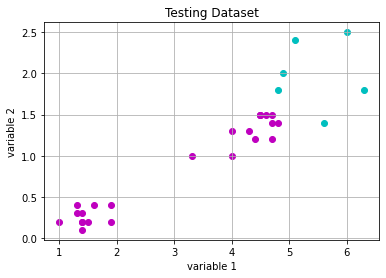

In [24]:
plot_classes(X_test,y_test,"Testing Dataset",0, 1, "variable 1","variable 2")

# SVM
*****
- In scikit-learn SVC: SVC --> C-SV --> SOFT SVM, with a the C parameter, the default value for $C$ is 1.0
- Remember $C$ is Regularization parameter. The strength of the regularization is inversely proportional to C. 
- Must be strictly positive. The penalty is a squared l2 penalty.
- Check [here](https://scikit-learn.org/stable/modules/svm.html#kernel-functions) for kernels in scikit-learn.

In [27]:
# Simple SVC 
from sklearn.svm import SVC

kernel = "linear"
svc = SVC(kernel=kernel).fit(X_train, y_train)

In [52]:
# Prediction
y_pred = svc.predict(X_test)

In [30]:
y_pred

array([1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

# Metrics

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix



In [54]:
cm = confusion_matrix(y_test, y_pred)

In [55]:
cm

array([[24,  0],
       [ 0,  6]])

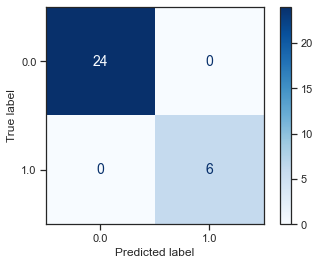

In [58]:
import matplotlib
font = {'size'   : 14}
matplotlib.rc('font', **font)

plot_confusion_matrix(svc, X_test,y_test, cmap=plt.cm.Blues)

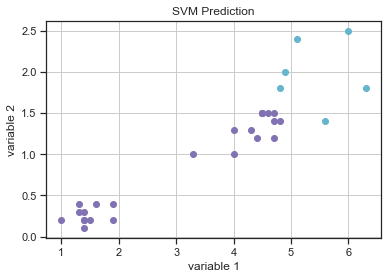

In [60]:
plot_classes(X_test,y_pred,"SVM Prediction",0, 1, "variable 1","variable 2")